# Data Exploration of UK Road Accident Dataset 
Contains data about Accidents, Vehicles and Casualties

## Data Exploration - Vehicles

We are exploring each column of the vehicle dataset for cleaning and feature manipulation.

# Importing Libraries

In [1]:
import pandas as pd #for the data structures
import numpy as np #for computation
import random
import seaborn as sns
from sklearn.model_selection import train_test_split #for processing and prediction
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt #for plotting
%matplotlib inline

In [2]:
# Reading the dataset and defining -1 as the null value in the dataset
missing_values=["-1","N/a","na", np.nan]
 
df= pd.read_csv("data/Road_Safety_Data_Vehicles_2019.csv",na_values=missing_values,low_memory=False)
df2= pd.read_csv("data/Road_Safety_Data_Vehicles_2018.csv",na_values=missing_values,low_memory=False)
df3= pd.read_csv("data/Road_Safety_Data_Vehicles_2017.csv",na_values=missing_values,low_memory=False)

df=df.append(df2, ignore_index=True)
df=df.append(df3, ignore_index=True)
df.head() #confirm correct data is imported

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2.01901E+12,1,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,1.0,58.0,9.0,NaN,NaN,NaN,2.0,1.0,2.0
1,2.01901E+12,2,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0
2,2.01901E+12,1,9.0,0.0,18.0,NaN,0.0,NaN,NaN,NaN,...,6.0,2.0,24.0,5.0,NaN,NaN,NaN,3.0,1.0,3.0
3,2.01901E+12,2,9.0,0.0,18.0,NaN,0.0,NaN,NaN,NaN,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,6.0,1.0,6.0
4,2.01901E+12,1,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,...,6.0,1.0,45.0,7.0,NaN,NaN,NaN,4.0,1.0,4.0


In [3]:
# shape of the data
df.shape 

(530870, 23)

In [4]:
# data type of the data
df.dtypes

Accident_Index                       object
Vehicle_Reference                     int64
Vehicle_Type                        float64
Towing_and_Articulation             float64
Vehicle_Manoeuvre                   float64
Vehicle_Location-Restricted_Lane    float64
Junction_Location                   float64
Skidding_and_Overturning            float64
Hit_Object_in_Carriageway           float64
Vehicle_Leaving_Carriageway         float64
Hit_Object_off_Carriageway          float64
1st_Point_of_Impact                 float64
Was_Vehicle_Left_Hand_Drive?        float64
Journey_Purpose_of_Driver           float64
Sex_of_Driver                       float64
Age_of_Driver                       float64
Age_Band_of_Driver                  float64
Engine_Capacity_(CC)                float64
Propulsion_Code                     float64
Age_of_Vehicle                      float64
Driver_IMD_Decile                   float64
Driver_Home_Area_Type               float64
Vehicle_IMD_Decile              

Shows data type of all the attributes is int64

In [5]:
# numerical columns
df.select_dtypes(include=[np.number]).columns.values

array(['Vehicle_Reference', 'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Was_Vehicle_Left_Hand_Drive?', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type', 'Vehicle_IMD_Decile'],
      dtype=object)

In [6]:
# categorical values
df.select_dtypes(exclude=[np.number]).columns.values

array(['Accident_Index'], dtype=object)

# Detecting or null values

In [7]:
#null count of attributes in the merged dataset
df.isnull().sum().sort_values(ascending=False) 

Vehicle_IMD_Decile                  158354
Driver_IMD_Decile                   158354
Age_of_Vehicle                      143555
Driver_Home_Area_Type               128243
Engine_Capacity_(CC)                125446
Propulsion_Code                     124316
Age_Band_of_Driver                   69508
Age_of_Driver                        69508
Skidding_and_Overturning             28306
Hit_Object_in_Carriageway            27889
Vehicle_Leaving_Carriageway          27015
Vehicle_Manoeuvre                    26970
Was_Vehicle_Left_Hand_Drive?         26725
Vehicle_Location-Restricted_Lane     26320
Hit_Object_off_Carriageway           25589
Junction_Location                    20014
1st_Point_of_Impact                  15190
Towing_and_Articulation              12386
Vehicle_Type                           635
Journey_Purpose_of_Driver               67
Sex_of_Driver                            6
Vehicle_Reference                        0
Accident_Index                           0
dtype: int6

Not considering the Accident_Index column value since it is a categorical value
Not considering Vehicle_Reference column value since it is for linking the casualities to vehicles
considering all the other null values from the columns.
We want to drop the rows in which the value for all the attributes is null or value is missing

In [8]:
# Drop rows in which values are missing for all columns leaving the columns Accident_Index and Vehicle_Reference
df.dropna(how='all',subset=['Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Was_Vehicle_Left_Hand_Drive?', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type', 'Vehicle_IMD_Decile'])

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2.01901E+12,1,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,1.0,58.0,9.0,NaN,NaN,NaN,2.0,1.0,2.0
1,2.01901E+12,2,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0
2,2.01901E+12,1,9.0,0.0,18.0,NaN,0.0,NaN,NaN,NaN,...,6.0,2.0,24.0,5.0,NaN,NaN,NaN,3.0,1.0,3.0
3,2.01901E+12,2,9.0,0.0,18.0,NaN,0.0,NaN,NaN,NaN,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,6.0,1.0,6.0
4,2.01901E+12,1,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,...,6.0,1.0,45.0,7.0,NaN,NaN,NaN,4.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530865,2017984121717,1,19.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,38.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
530866,2017984121717,2,21.0,1.0,18.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,63.0,9.0,12777.0,2.0,NaN,5.0,2.0,5.0
530867,2017984122317,1,4.0,0.0,17.0,0.0,0.0,1.0,0.0,0.0,...,6.0,1.0,25.0,5.0,498.0,1.0,16.0,NaN,1.0,NaN
530868,2017984122617,1,9.0,0.0,9.0,0.0,5.0,0.0,0.0,0.0,...,6.0,1.0,49.0,8.0,1997.0,2.0,NaN,NaN,3.0,NaN


The number of rows and columns is same as the original dataset which states that no rows are dropped. This means that none of the rows have missing values for all the columns

<AxesSubplot:>

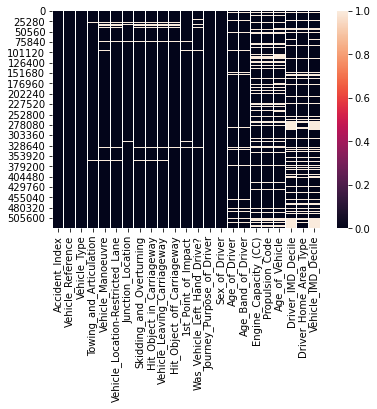

In [9]:
#Visualization of missing values with heatmap
sns.heatmap(df.isnull())

The heatmap also shows that the columns 'Vehicle_IMD_Decile', 'Driver_IMD_Decile' , 'Age_of_Vehicle' are the columns missing most values.

In [10]:
#Shows percentage of missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
#Reference: https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

Accident_Index - 0%
Vehicle_Reference - 0%
Vehicle_Type - 0%
Towing_and_Articulation - 2%
Vehicle_Manoeuvre - 5%
Vehicle_Location-Restricted_Lane - 5%
Junction_Location - 4%
Skidding_and_Overturning - 5%
Hit_Object_in_Carriageway - 5%
Vehicle_Leaving_Carriageway - 5%
Hit_Object_off_Carriageway - 5%
1st_Point_of_Impact - 3%
Was_Vehicle_Left_Hand_Drive? - 5%
Journey_Purpose_of_Driver - 0%
Sex_of_Driver - 0%
Age_of_Driver - 13%
Age_Band_of_Driver - 13%
Engine_Capacity_(CC) - 24%
Propulsion_Code - 23%
Age_of_Vehicle - 27%
Driver_IMD_Decile - 30%
Driver_Home_Area_Type - 24%
Vehicle_IMD_Decile - 30%


# Handling missing values and Manipulating features

Most of the attributes in the dataset have numerical values but these values are not absolute values but are code for different lables. Therefore, we are not taking mean/median imputation (unless needed). We are using other methods for imputation. In case where we have used mean/median imputation, it is specified in that particular section.

# Vehicle_Type

In [11]:
df['Vehicle_Type'].value_counts()

9.0     370030
1.0      43429
19.0     28241
3.0      20315
5.0      13336
8.0      13073
11.0     11274
21.0      8354
4.0       5559
2.0       4125
90.0      3582
98.0      2663
20.0      2429
17.0      1052
10.0      1031
97.0       850
22.0       531
16.0       175
23.0       132
18.0        54
Name: Vehicle_Type, dtype: int64

In [12]:
df['Vehicle_Type'].isnull().sum()

635

<AxesSubplot:>

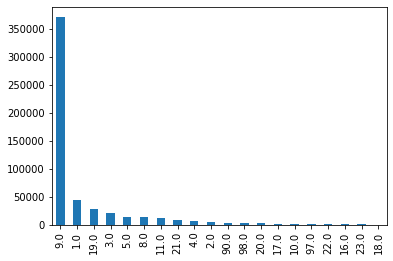

In [13]:
df['Vehicle_Type'].value_counts().plot.bar()

In [14]:
#Replacing the value of the lable other vehicles to null so that it can be covered in the available categories because the available lables cover approximately most vehicle types
df['Vehicle_Type'].replace(90.0,np.nan, inplace=True)

#Get new count of null values
df['Vehicle_Type'].isnull().sum()

4217

In [15]:
#percentage of every value
df['Vehicle_Type'].value_counts()/df.shape[0]*100

9.0     69.702564
1.0      8.180722
19.0     5.319758
3.0      3.826737
5.0      2.512103
8.0      2.462561
11.0     2.123684
21.0     1.573643
4.0      1.047149
2.0      0.777026
98.0     0.501629
20.0     0.457551
17.0     0.198165
10.0     0.194210
97.0     0.160115
22.0     0.100024
16.0     0.032965
23.0     0.024865
18.0     0.010172
Name: Vehicle_Type, dtype: float64

In [16]:
#Filling the null values by 9 and getting the new % for every value
df['Vehicle_Type'].fillna(9, inplace=True)
df['Vehicle_Type'].value_counts()/df.shape[0]*100

9.0     70.496920
1.0      8.180722
19.0     5.319758
3.0      3.826737
5.0      2.512103
8.0      2.462561
11.0     2.123684
21.0     1.573643
4.0      1.047149
2.0      0.777026
98.0     0.501629
20.0     0.457551
17.0     0.198165
10.0     0.194210
97.0     0.160115
22.0     0.100024
16.0     0.032965
23.0     0.024865
18.0     0.010172
Name: Vehicle_Type, dtype: float64

# Towing_and_Articulation

In [17]:
df['Towing_and_Articulation'].describe()

count    518484.000000
mean          0.032684
std           0.327116
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: Towing_and_Articulation, dtype: float64

In [18]:
#Count of null values
df['Towing_and_Articulation'].isnull().sum()

12386

In [19]:
df['Towing_and_Articulation'].value_counts()/df.shape[0]*100

0.0    96.208865
1.0     0.895134
4.0     0.321736
5.0     0.151450
3.0     0.073464
2.0     0.016200
Name: Towing_and_Articulation, dtype: float64

This shows that for approx 96% of the accidents are caused by the vehicle which has code 0 (label:No tow/articulation). 

<AxesSubplot:>

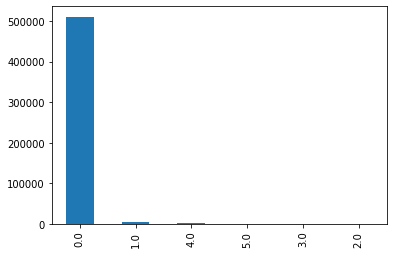

In [20]:
# Bar graph for Towing_and_Articulation
df['Towing_and_Articulation'].value_counts().plot.bar()

The bar graph also shows that the maximum number of values in the Towing_and_Articulation column is 0. So we decided to impute the missing values with o which is code for the lable No tow/articulation

In [21]:
#Filling the null values with 0
df['Towing_and_Articulation'].fillna(0, inplace=True)
df['Towing_and_Articulation'].value_counts()/df.shape[0]*100

0.0    98.542016
1.0     0.895134
4.0     0.321736
5.0     0.151450
3.0     0.073464
2.0     0.016200
Name: Towing_and_Articulation, dtype: float64

Shows the new percentile of the label after imputing the values

# Vehicle_Manoeuvre

In [22]:
#The numerical values in the column are codes for different lables
df['Vehicle_Manoeuvre'].describe()

count    503900.000000
mean         12.674171
std           6.207575
min           1.000000
25%           7.000000
50%          17.000000
75%          18.000000
max          18.000000
Name: Vehicle_Manoeuvre, dtype: float64

In [23]:
df['Vehicle_Manoeuvre'].value_counts()

18.0    246677
9.0      48156
4.0      35594
3.0      29080
5.0      25377
2.0      22064
7.0      17014
17.0     16181
16.0     14195
13.0      9574
10.0      7548
1.0       7433
14.0      5764
12.0      4475
11.0      4238
6.0       4198
15.0      3824
8.0       2508
Name: Vehicle_Manoeuvre, dtype: int64

<AxesSubplot:>

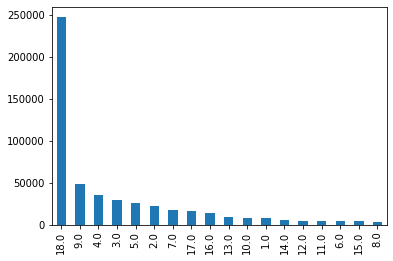

In [24]:
# Bar graph for Vehicle_Manoeuvre
df['Vehicle_Manoeuvre'].value_counts().plot.bar()

The distribution of values is spread across the lables and does not show any clear pattern. Using the ffill method for imputing values because the distribution is random and spreaded. 
So by using ffill the value imputed are expected to be according to the weigts of the existing values

In [25]:
# Imputing values using ffill and getting the no. of null values after ffill
df['Vehicle_Manoeuvre'].fillna(method='ffill', inplace=True)
df['Vehicle_Manoeuvre'].isnull().sum()

2

In [26]:
#Impute remaining values using bfill and get null count after bfill
df['Vehicle_Manoeuvre'].fillna(method='bfill', inplace=True)
df['Vehicle_Manoeuvre'].isnull().sum()

0

# Vehicle_Location-Restricted_Lane

In [27]:
# The numerical values in the column are codes for different lables
df['Vehicle_Location-Restricted_Lane'].describe()

count    504550.000000
mean          0.193927
std           1.186187
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: Vehicle_Location-Restricted_Lane, dtype: float64

In [28]:
df['Vehicle_Location-Restricted_Lane'].value_counts()/df.shape[0]*100

0.0    92.019138
9.0     1.259442
2.0     0.605421
4.0     0.430614
6.0     0.305348
5.0     0.147305
8.0     0.122629
7.0     0.060655
3.0     0.048599
1.0     0.042948
Name: Vehicle_Location-Restricted_Lane, dtype: float64

<AxesSubplot:>

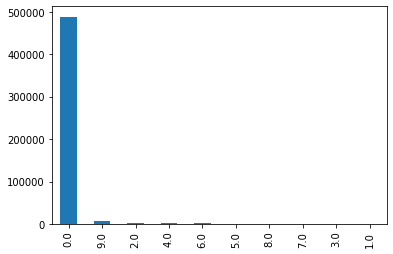

In [29]:
# Bar Graph of original values of Vehicle_Location-Restricted_Lane column
df['Vehicle_Location-Restricted_Lane'].value_counts().plot.bar()

As per the percentage of the existing values and the graph, approximately 93% of the column is the value 0.Impute the missing values by the maximum appearing value (i.e) 0.

In [30]:
#impute o for missing values. get percentage of every value.
df['Vehicle_Location-Restricted_Lane'].fillna(0, inplace=True)
df['Vehicle_Location-Restricted_Lane'].value_counts()/df.shape[0]*100

0.0    96.977038
9.0     1.259442
2.0     0.605421
4.0     0.430614
6.0     0.305348
5.0     0.147305
8.0     0.122629
7.0     0.060655
3.0     0.048599
1.0     0.042948
Name: Vehicle_Location-Restricted_Lane, dtype: float64

### Change in the percentage of the value 0 from 93% to 97% after imputation

# Junction_Location

In [31]:
# The numerical values in the column are codes for different lables
df['Junction_Location'].describe()

count    510856.000000
mean          2.287813
std           3.005223
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max           8.000000
Name: Junction_Location, dtype: float64

In [32]:
df['Junction_Location'].value_counts()/df.shape[0]*100

0.0    39.675438
1.0    23.197393
8.0    16.273852
2.0     5.852657
6.0     4.129071
4.0     2.747000
5.0     2.381751
3.0     1.604536
7.0     0.368263
Name: Junction_Location, dtype: float64

<AxesSubplot:>

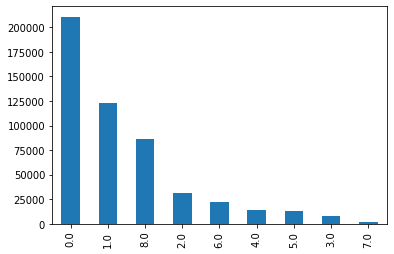

In [33]:
# Bar Graph of original values of junction_location column 
df['Junction_Location'].value_counts().plot.bar()

In [34]:
# Using ffill to impute 
df['Junction_Location'].fillna(method='ffill', inplace=True)

# Check no of missing values after ffill imputation
df['Junction_Location'].isnull().sum()

2

In [35]:
#bfill for the Values which are not imputed by ffill
df['Junction_Location'].fillna(method='bfill', inplace=True)

# Check no of missing values after bfill imputation
df['Junction_Location'].isnull().sum()

0

In [36]:
#value percentage after imputation
df['Junction_Location'].value_counts()/df.shape[0]*100

0.0    40.904553
1.0    24.466630
8.0    16.778496
2.0     6.215834
6.0     4.262437
4.0     2.828753
5.0     2.484036
3.0     1.673668
7.0     0.385593
Name: Junction_Location, dtype: float64

# Skidding_and_Overturning

In [37]:
#The numerical values in the column are codes for different lables
df['Skidding_and_Overturning'].describe()

count    502564.00000
mean          0.21799
std           0.81964
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           5.00000
Name: Skidding_and_Overturning, dtype: float64

In [38]:
#get null count
df['Skidding_and_Overturning'].isnull().sum()

28306

In [39]:
df['Skidding_and_Overturning'].value_counts()/df.shape[0]*100

0.0    84.569292
1.0     6.177219
5.0     2.186223
2.0     1.694577
3.0     0.023546
4.0     0.017142
Name: Skidding_and_Overturning, dtype: float64

<AxesSubplot:>

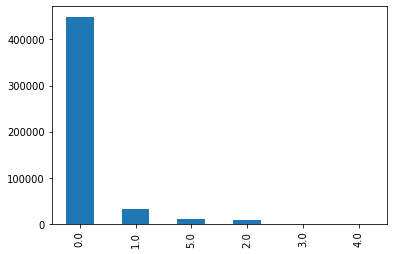

In [40]:
# Bar Graph of original values in Skidding_and_Overturning column
df['Skidding_and_Overturning'].value_counts().plot.bar()

Maximum number of values in the Skidding_and_Overturning column is 0. so we imputed the missing values with 0

In [41]:
#Imputing the missing values by 0
df['Skidding_and_Overturning'].fillna(0, inplace=True)

#get null count after ffill
df['Skidding_and_Overturning'].isnull().sum()

0

In [42]:
df['Skidding_and_Overturning'].value_counts()/df.shape[0]*100

0.0    89.901294
1.0     6.177219
5.0     2.186223
2.0     1.694577
3.0     0.023546
4.0     0.017142
Name: Skidding_and_Overturning, dtype: float64

percentage of the value 0 increased from approx 85% to 89%.

# Hit_Object_in_Carriageway 

In [43]:
#the numerical values in the column are codes for different lables
df['Hit_Object_in_Carriageway'].describe()

count    502981.000000
mean          0.340239
std           1.652775
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: Hit_Object_in_Carriageway, dtype: float64

In [44]:
df['Hit_Object_in_Carriageway'].value_counts()/df.shape[0]*100

0.0     90.201933
4.0      1.754290
10.0     1.384143
7.0      0.493906
11.0     0.364684
8.0      0.152391
12.0     0.103038
9.0      0.097011
2.0      0.079869
1.0      0.051802
6.0      0.051425
5.0      0.012056
Name: Hit_Object_in_Carriageway, dtype: float64

<AxesSubplot:>

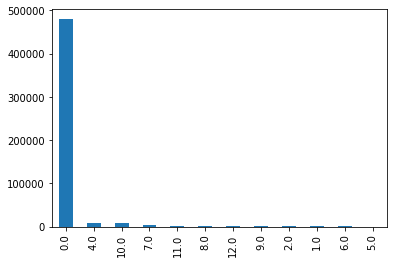

In [45]:
# Bar Graph of original values in Hit_Object_in_Carriageway column
df['Hit_Object_in_Carriageway'].value_counts().plot.bar()

In [46]:
#Impute using ffill 
df['Hit_Object_in_Carriageway'].fillna(method='ffill', inplace=True)

#get null values after ffill
df['Hit_Object_in_Carriageway'].isnull().sum()

4

In [47]:
#Impute values using bfill
df['Hit_Object_in_Carriageway'].fillna(method='bfill', inplace=True)

#get null values after bfill
df['Hit_Object_in_Carriageway'].isnull().sum()

0

In [48]:
df['Hit_Object_in_Carriageway'].value_counts()/df.shape[0]*100

0.0     95.191101
4.0      1.824929
10.0     1.466837
7.0      0.531957
11.0     0.402547
8.0      0.173677
12.0     0.109066
9.0      0.099459
2.0      0.080811
6.0      0.053309
1.0      0.053120
5.0      0.013186
Name: Hit_Object_in_Carriageway, dtype: float64

# Vehicle_Leaving_Carriageway

In [49]:
# The numerical values in the column are codes for different lables
df['Vehicle_Leaving_Carriageway'].describe()

count    503855.000000
mean          0.321084
std           1.287943
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: Vehicle_Leaving_Carriageway, dtype: float64

In [50]:
df['Vehicle_Leaving_Carriageway'].value_counts()/df.shape[0]*100

0.0    85.332002
1.0     5.099930
7.0     2.503814
2.0     0.618984
3.0     0.406879
4.0     0.345282
8.0     0.302146
5.0     0.221900
6.0     0.080246
Name: Vehicle_Leaving_Carriageway, dtype: float64

<AxesSubplot:>

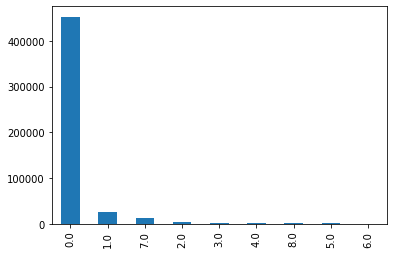

In [51]:
# Bar Graph of original values in Vehicle_Leaving_Carriageway column
df['Vehicle_Leaving_Carriageway'].value_counts().plot.bar()

The percentage values and the bar graph shows the value appearing maximum number of times is 0. so for even weighted distribution of the value we use ffill and bfill to impute values.

In [52]:
#Using ffill to impute
df['Vehicle_Leaving_Carriageway'].fillna(method='ffill', inplace=True)

#get null values after ffill
df['Vehicle_Leaving_Carriageway'].isnull().sum()

4

In [53]:
#Use bfill to impute the remaining
df['Vehicle_Leaving_Carriageway'].fillna(method='bfill', inplace=True)

#Check remaining null values after bfill
df['Vehicle_Leaving_Carriageway'].isnull().sum()

0

In [54]:
# Get the percentage of all the unique values to analuze the increase in their respective percentage after imputation
df['Vehicle_Leaving_Carriageway'].value_counts()/df.shape[0]*100

0.0    90.149943
1.0     5.249119
7.0     2.563905
2.0     0.634242
3.0     0.433816
4.0     0.353005
8.0     0.309492
5.0     0.225102
6.0     0.081376
Name: Vehicle_Leaving_Carriageway, dtype: float64

# Hit_Object_off_Carriageway

In [55]:
#the numerical values in the column are codes for different lables
df['Hit_Object_off_Carriageway'].describe()

count    505281.000000
mean          0.416802
std           1.858703
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: Hit_Object_off_Carriageway, dtype: float64

In [56]:
df['Hit_Object_off_Carriageway'].value_counts()/df.shape[0]*100

0.0     89.351630
10.0     1.187296
11.0     1.089721
4.0      0.935257
1.0      0.588280
2.0      0.497297
9.0      0.486560
7.0      0.416109
6.0      0.398026
3.0      0.179140
5.0      0.044644
8.0      0.005839
Name: Hit_Object_off_Carriageway, dtype: float64

<AxesSubplot:>

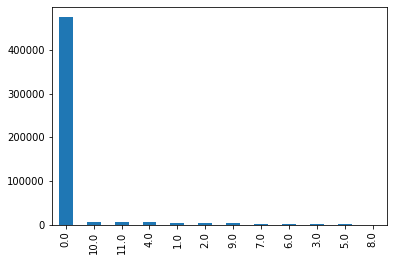

In [57]:
# Bar Graph of original values in Hit_Object_off_Carriageway column
df['Hit_Object_off_Carriageway'].value_counts().plot.bar()

In [58]:
#Impute using ffill
df['Hit_Object_off_Carriageway'].fillna(method='ffill', inplace=True)

#get null count after ffill
df['Hit_Object_off_Carriageway'].isnull().sum()

4

In [59]:
#impute remaining values using bfill
df['Hit_Object_off_Carriageway'].fillna(method='bfill', inplace=True)

#get null count after bfill
df['Hit_Object_off_Carriageway'].isnull().sum()

0

In [60]:
df['Hit_Object_off_Carriageway'].value_counts()/df.shape[0]*100

0.0     94.034698
10.0     1.230245
11.0     1.108934
4.0      0.948631
1.0      0.605798
2.0      0.521785
9.0      0.486937
7.0      0.428730
6.0      0.401417
3.0      0.180835
5.0      0.046151
8.0      0.005839
Name: Hit_Object_off_Carriageway, dtype: float64

# 1st_Point_of_Impact

In [61]:
#the numerical values in the column are codes for different lables
df['1st_Point_of_Impact'].describe()

count    515680.000000
mean          1.757860
std           1.149519
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           4.000000
Name: 1st_Point_of_Impact, dtype: float64

In [62]:
df['1st_Point_of_Impact'].value_counts()/df.shape[0]*100

1.0    48.944939
2.0    16.874941
3.0    13.388777
4.0    11.973741
0.0     5.956260
Name: 1st_Point_of_Impact, dtype: float64

<AxesSubplot:>

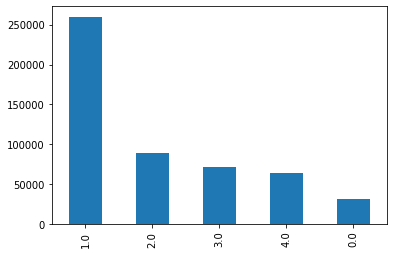

In [63]:
# Bar Graph of original values in 1st_Point_of_Impact column
df['1st_Point_of_Impact'].value_counts().plot.bar()

In [64]:
#Impute using ffill
df['1st_Point_of_Impact'].fillna(method='ffill', inplace=True)

#get null count after ffill
df['1st_Point_of_Impact'].isnull().sum()

0

The number of missing values is 0, which means that the ffill method successfully imputed all the missing values in the 1st_Point_of_Impact column

In [65]:
#percentage of every value
df['1st_Point_of_Impact'].value_counts()/df.shape[0]*100

1.0    50.531203
2.0    17.359617
3.0    13.659276
4.0    12.273438
0.0     6.176465
Name: 1st_Point_of_Impact, dtype: float64

# Was_Vehicle_Left_Hand_Drive?

In [66]:
#1 represents no and 2 represents yes
df['Was_Vehicle_Left_Hand_Drive?'].describe()

count    504145.000000
mean          1.007141
std           0.084201
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: Was_Vehicle_Left_Hand_Drive?, dtype: float64

In [67]:
df['Was_Vehicle_Left_Hand_Drive?'].value_counts()/df.shape[0]*100

1.0    94.287679
2.0     0.678132
Name: Was_Vehicle_Left_Hand_Drive?, dtype: float64

<AxesSubplot:>

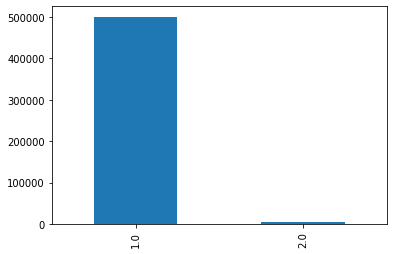

In [68]:
# Bar Graph of original values in Was_Vehicle_Left_Hand_Drive? column
df['Was_Vehicle_Left_Hand_Drive?'].value_counts().plot.bar()

Bar graph and percentage data shows that maximum number of vehicles were not left hand drive. So we are imputing the missing values in the column by 1 which represents false for Was_Vehicle_Left_Hand_Drive?

In [69]:
#Replacing null values by 1
df['Was_Vehicle_Left_Hand_Drive?'].fillna(1,inplace=True)

#get value percentage
df['Was_Vehicle_Left_Hand_Drive?'].value_counts()/df.shape[0]*100

1.0    99.321868
2.0     0.678132
Name: Was_Vehicle_Left_Hand_Drive?, dtype: float64

# Journey_Purpose_of_Driver

In [70]:
#the numerical values in the column are codes for different lables
df['Journey_Purpose_of_Driver'].describe()

count    530803.000000
mean          4.679307
std           1.992015
min           1.000000
25%           2.000000
50%           6.000000
75%           6.000000
max           6.000000
Name: Journey_Purpose_of_Driver, dtype: float64

In [71]:
df['Journey_Purpose_of_Driver'].value_counts()/df.shape[0]*100

6.0    63.449244
1.0    14.957146
2.0    11.085388
5.0     9.107126
3.0     1.041310
4.0     0.347166
Name: Journey_Purpose_of_Driver, dtype: float64

In [72]:
#number of missing values because shows as 0% in the dataset
df['Journey_Purpose_of_Driver'].isnull().sum()

67

<AxesSubplot:>

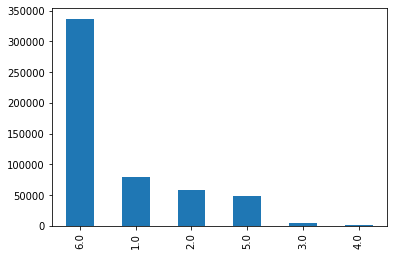

In [73]:
# Bar Graph of original values in Journey_Purpose_of_Driver column
df['Journey_Purpose_of_Driver'].value_counts().plot.bar()

#### In the Journey_Purpose_of_Driver  column the code 5 and 6 represents unknown values (approx 11% and 61% respectively) which is kind of missing values so we cannot use previously used imputation methods as that will result in imputing unknown values. 
#### Also taking into account the -1,5 and 6 for the values in the column, comprising of 0.000133, 11.055 and 61.728 respectibely (the value are taken till 3 decimal values) they constitute of appprox 73% of the dataset. Since 73% of the data of this column is missing we have decided to drop the column.

In [74]:
#Drop the column
df.drop('Journey_Purpose_of_Driver', axis=1, inplace=True)

# Sex_of_Driver

In [75]:
#The numerical values in the column are codes for different lables
# 1 represents male, 2 represents female and 3 represents not known
df['Sex_of_Driver'].describe()

count    530864.000000
mean          1.467089
std           0.671756
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: Sex_of_Driver, dtype: float64

In [76]:
df['Sex_of_Driver'].value_counts()/df.shape[0]*100

1.0    63.407237
2.0    26.474843
3.0    10.116789
Name: Sex_of_Driver, dtype: float64

<AxesSubplot:>

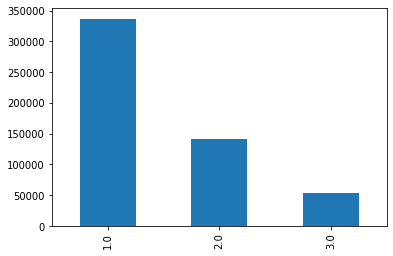

In [77]:
# Bar Graph of original values in Sex_of_Driver column
df['Sex_of_Driver'].value_counts().plot.bar()

In [78]:
#get null count
df['Sex_of_Driver'].isnull().sum()

6

Since the column has only six missing value and approx. 9% of the data in the column is unknown, we replace the unknown value by null and then impute values using ffill and bfill

In [79]:
# Replace the unknown values with null 
df['Sex_of_Driver'].replace(3,np.nan, inplace=True)

#get null count 
df['Sex_of_Driver'].isnull().sum()

53713

In [80]:
#Impute using ffill
df['Sex_of_Driver'].fillna(method='ffill',inplace=True)

#get null count after ffill
df['Sex_of_Driver'].isnull().sum()

0

# Age_Band_of_Driver

In [81]:
df['Age_Band_of_Driver'].describe()

count    461362.000000
mean          6.910272
std           1.759869
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          11.000000
Name: Age_Band_of_Driver, dtype: float64

In [82]:
df['Age_Band_of_Driver'].value_counts()/df.shape[0]*100

6.0     21.514495
7.0     16.807316
8.0     15.186769
5.0     10.016011
9.0      8.914612
4.0      6.458455
10.0     4.386008
11.0     2.705747
3.0      0.731252
2.0      0.168591
1.0      0.017518
Name: Age_Band_of_Driver, dtype: float64

<AxesSubplot:>

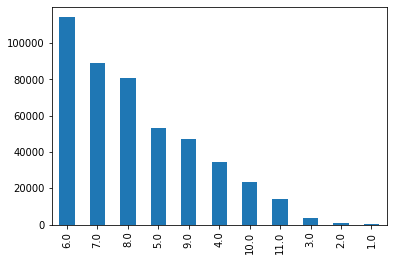

In [83]:
#Bar Graph of original values in Age_Band_of_Driver column
df['Age_Band_of_Driver'].value_counts().plot.bar()

In [84]:
#get null count
df['Age_Band_of_Driver'].isnull().sum()

69508

In [85]:
#Impute using ffill
df['Age_Band_of_Driver'].fillna(method='ffill',inplace=True)

#get null count after ffill
df['Age_Band_of_Driver'].isnull().sum()

0

# Age_of_Driver

In [86]:
#df['Age_of_Driver'].describe()
#df['Age_of_Driver'].value_counts()/df.shape[0]*100

The column Age_of_Driver and Age_Band_of_Driver represent the same data in different forms. Age_Band_of_Driver is representing the data in a concise form which reduces the computation and helps achieve the similar results as Age_of_Driver data. Hence, we decided to drop the Age_of_Driver column.

In [87]:
# drop the column
df.drop('Age_of_Driver', axis=1, inplace=True)

# Engine_Capacity_(CC)

In [88]:
# Numerical value is absolute value represents the cc of the vehicle
df['Engine_Capacity_(CC)'].describe()

count    405424.000000
mean       1863.099545
std        1608.411092
min           1.000000
25%        1248.000000
50%        1598.000000
75%        1995.000000
max       99999.000000
Name: Engine_Capacity_(CC), dtype: float64

In [89]:
df['Engine_Capacity_(CC)'].value_counts()/df.shape[0]*100

1598.0    5.819127
1968.0    2.993577
1995.0    2.926705
998.0     2.678810
1560.0    2.526607
            ...   
1007.0    0.000188
4038.0    0.000188
1568.0    0.000188
1569.0    0.000188
2.0       0.000188
Name: Engine_Capacity_(CC), Length: 1356, dtype: float64

In [90]:
#get null count
df['Engine_Capacity_(CC)'].isnull().sum()

125446

Engine_Capacity_(CC) is a numerical data so to detect any outliers we are plotting box plot.

<AxesSubplot:>

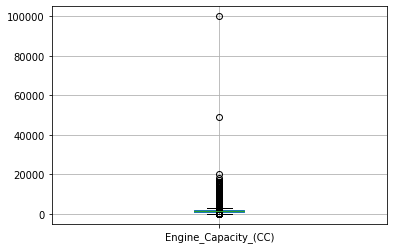

In [91]:
#Boxplot to get overview of potential outliers
df.boxplot(column='Engine_Capacity_(CC)')

#### We can see that most of the values lie below and around the 20000 mark and there are outliers above 20000. Another outliers appear around the value 1.
#### Since this is not the case where outlier data is useful, we will replace it with null and then impute the missing values.

In [92]:
#get values for upper limit of dataset (99.99%) for outlier detection
max_val_cc=df['Engine_Capacity_(CC)'].quantile(0.9999)
max_val_cc

16353.0

In [93]:
#Get values of column greater than max_val_cc
df[df['Engine_Capacity_(CC)']>max_val_cc]

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
68624,2018010086560,1,11.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,6.0,18146.0,2.0,7.0,4.0,1.0,4.0
111603,2018030283666,1,21.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,8.0,16400.0,2.0,3.0,NaN,3.0,NaN
116530,201804SB18042,3,21.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,8.0,16400.0,2.0,4.0,5.0,1.0,5.0
172999,2018210341657,2,21.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,6.0,16400.0,2.0,2.0,NaN,3.0,NaN
174399,2018220283261,2,21.0,0.0,18.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,9.0,16400.0,2.0,2.0,1.0,1.0,1.0
176591,2018220344834,1,2.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,...,3.0,1.0,2.0,4.0,49000.0,1.0,3.0,5.0,3.0,5.0
192061,2018331801009,1,21.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,8.0,16400.0,2.0,3.0,NaN,NaN,NaN
195871,2018350280276,6,21.0,1.0,18.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,8.0,16400.0,2.0,2.0,NaN,3.0,NaN
199504,2018360290045,1,21.0,0.0,18.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,6.0,16400.0,2.0,2.0,7.0,3.0,7.0
200955,2018360331783,2,8.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,1.0,7.0,19997.0,2.0,6.0,2.0,1.0,2.0


In [94]:
#get values for lower limit of dataset (0.01%) for outlier detection
min_val_cc=df['Engine_Capacity_(CC)'].quantile(0.0001)
min_val_cc

49.0

In [95]:
#get values of the column less than min_val_cc 
df[df['Engine_Capacity_(CC)']<min_val_cc]

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
7674,2.01901E+12,2,2.0,0.0,13.0,0.0,1.0,2.0,0.0,0.0,...,3.0,1.0,1.0,7.0,48.0,1.0,9.0,4.0,1.0,4.0
36054,2.01901E+12,2,9.0,0.0,16.0,0.0,1.0,0.0,0.0,0.0,...,2.0,1.0,2.0,8.0,2.0,2.0,12.0,7.0,1.0,7.0
78628,2018010104468,1,2.0,0.0,5.0,0.0,8.0,0.0,0.0,0.0,...,1.0,1.0,2.0,8.0,48.0,1.0,7.0,9.0,1.0,9.0
86493,2018010116795,1,2.0,0.0,14.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,2.0,7.0,48.0,1.0,12.0,2.0,1.0,2.0
99580,2018010137237,2,2.0,0.0,18.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,2.0,5.0,48.0,1.0,6.0,6.0,1.0,6.0
140651,2018120032829,2,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,4.0,48.0,1.0,7.0,4.0,1.0,4.0
141048,2018120070982,1,2.0,0.0,18.0,0.0,4.0,1.0,0.0,1.0,...,1.0,1.0,1.0,4.0,48.0,1.0,1.0,5.0,2.0,5.0
179419,2018230824825,1,2.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,...,3.0,1.0,1.0,4.0,48.0,1.0,1.0,10.0,2.0,10.0
189338,2018320457572,1,2.0,0.0,9.0,9.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,7.0,48.0,1.0,28.0,10.0,NaN,10.0
201287,2018360340030,1,2.0,0.0,18.0,0.0,8.0,1.0,0.0,0.0,...,0.0,1.0,1.0,4.0,48.0,1.0,1.0,3.0,1.0,3.0


We have found max. outliers to be greater than approx. 16353 cc which is 99.99% and min. outlier 49 which is  0.01%. We replace these values by null and then impute.

In [96]:
#replacing the outliers by null
#Reference: https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
df.loc[df['Engine_Capacity_(CC)']>max_val_cc,'Engine_Capacity_(CC)']=np.nan
df.loc[df['Engine_Capacity_(CC)']<min_val_cc,'Engine_Capacity_(CC)']=np.nan

In [97]:
#get null count after replecing outlier with null
df['Engine_Capacity_(CC)'].isnull().sum()

125517

In [98]:
df['Engine_Capacity_(CC)'].describe()

count    405353.000000
mean       1861.583124
std        1593.323503
min          49.000000
25%        1248.000000
50%        1598.000000
75%        1995.000000
max       16353.000000
Name: Engine_Capacity_(CC), dtype: float64

In [99]:
#df['Engine_Capacity_(CC)']=df['Engine_Capacity_(CC)'].fillna(df['Engine_Capacity_(CC)'].mean())
# Use ffill for imputation because mean imputation resulted in the mean being 25% of the data
df['Engine_Capacity_(CC)'].fillna(method='ffill', inplace=True)

#get null count after ffill
df['Engine_Capacity_(CC)'].isnull().sum()

15

In [100]:
#Impute remaining values using bfill
df['Engine_Capacity_(CC)'].fillna(method='bfill', inplace=True)

#get null count after bfill
df['Engine_Capacity_(CC)'].isnull().sum()

0

# Propulsion_Code

In [101]:
#The numerical values in the column are codes for different lables
df['Propulsion_Code'].describe()

count    406554.000000
mean          1.612140
std           1.144696
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          12.000000
Name: Propulsion_Code, dtype: float64

In [102]:
df['Propulsion_Code'].value_counts()/df.shape[0]*100

1.0     41.417296
2.0     33.113757
8.0      1.820220
3.0      0.121875
7.0      0.056134
12.0     0.030893
6.0      0.011302
5.0      0.010549
10.0     0.000377
9.0      0.000188
Name: Propulsion_Code, dtype: float64

<AxesSubplot:>

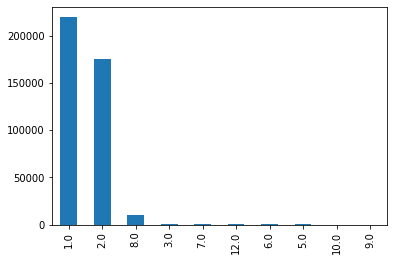

In [103]:
df['Propulsion_Code'].value_counts().plot.bar()

In [104]:
#impute using ffill
df['Propulsion_Code'].fillna(method='ffill', inplace=True)

#get null count after ffill
df['Propulsion_Code'].isnull().sum()

15

In [105]:
#Impute remaining values using bfill
df['Propulsion_Code'].fillna(method='bfill', inplace=True)

#get null count after bfill
df['Propulsion_Code'].isnull().sum()

0

# Age_of_Vehicle

In [106]:
df['Age_of_Vehicle'].describe()

count    387315.000000
mean          8.056943
std           5.276200
min           1.000000
25%           4.000000
50%           8.000000
75%          12.000000
max          94.000000
Name: Age_of_Vehicle, dtype: float64

In [107]:
df['Age_of_Vehicle'].value_counts()/df.shape[0]*100

1.0     6.406842
2.0     6.005237
3.0     5.611355
4.0     5.208808
5.0     4.722060
          ...   
78.0    0.000188
69.0    0.000188
70.0    0.000188
77.0    0.000188
64.0    0.000188
Name: Age_of_Vehicle, Length: 81, dtype: float64

In [108]:
#get null count
df['Age_of_Vehicle'].isnull().sum()

143555

<AxesSubplot:>

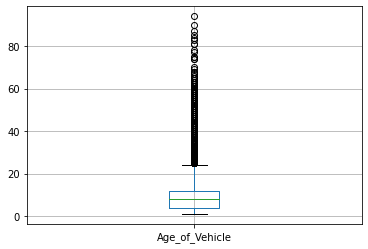

In [109]:
#boxplot to get overview of any existing outliers
df.boxplot(column='Age_of_Vehicle')

In [110]:
#get values for upper limit of dataset (99.99%) for outlier detection
max_val_veh_age=df['Age_of_Vehicle'].quantile(0.9999)
max_val_veh_age

61.0

In [111]:
#get values for lower limit of dataset (0.01%) for outlier detection
min_val_veh_age=df['Age_of_Vehicle'].quantile(0.0001)
min_val_veh_age

1.0

In [112]:
#get values of the column greater than max_val_veh_age
df[df['Age_of_Vehicle']>max_val_veh_age]

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
49795,2.01904E+12,1,9.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,...,3.0,1.0,1.0,11.0,1271.0,1.0,87.0,NaN,NaN,NaN
50903,2.01904E+12,1,4.0,0.0,18.0,0.0,2.0,2.0,0.0,0.0,...,4.0,1.0,1.0,10.0,490.0,1.0,94.0,6.0,3.0,6.0
50909,2.01904E+12,7,4.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,1.0,10.0,500.0,1.0,63.0,6.0,3.0,6.0
63496,2.01907E+12,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,11.0,2500.0,1.0,90.0,8.0,2.0,8.0
84137,2018010113253,1,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,3.0,2.0,1.0,6.0,3781.0,1.0,65.0,7.0,1.0,7.0
85753,2018010115783,1,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,1.0,10.0,350.0,1.0,66.0,6.0,1.0,6.0
116595,201804SB18078,2,9.0,0.0,18.0,0.0,8.0,1.0,0.0,0.0,...,1.0,1.0,1.0,10.0,1275.0,1.0,65.0,9.0,1.0,9.0
141993,2018121800203,1,4.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,9.0,500.0,1.0,67.0,1.0,1.0,1.0
163171,2018200293365,2,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,9.0,1172.0,1.0,68.0,NaN,NaN,NaN
198647,2018350820391,2,4.0,0.0,17.0,0.0,0.0,5.0,0.0,1.0,...,3.0,1.0,1.0,10.0,350.0,1.0,62.0,8.0,3.0,8.0


In [113]:
#get values of the column greater than max_val_veh_age
df[df['Age_of_Vehicle']<min_val_veh_age]

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile


#### The upper outlier is approx 61 which is 99.99% so we replace thses values with null and replace. Lower outlier is 1 which is acceptable for the manufacture for a vehicle so we did not replace those values.

In [114]:
#Replacing outliers by null
##Reference: https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
df.loc[df['Age_of_Vehicle']>max_val_cc,'Age_of_Vehicle']=np.nan

#get null count
df['Age_of_Vehicle'].isnull().sum()

143555

In [115]:
#Impute using ffill
df['Age_of_Vehicle'].fillna(method='ffill', inplace=True)

#get null count after ffill
df['Age_of_Vehicle'].isnull().sum()

15

In [116]:
#Impute remaining values using bfill
df['Age_of_Vehicle'].fillna(method='bfill', inplace=True)

#get null count after bfill
df['Age_of_Vehicle'].isnull().sum()

0

# Driver_IMD_Decile

In [117]:
#df['Driver_IMD_Decile'].describe()
#df['Driver_IMD_Decile'].value_counts()/df.shape[0]*100

There is no information about this column in the lookup table, so we cannot classify the information into meaningful results. So we decided to drop this column.

In [118]:
#drop the column
df.drop('Driver_IMD_Decile', axis=1, inplace=True)

# Driver_Home_Area_Type

In [119]:
#df['Driver_Home_Area_Type'].describe()
#df['Driver_Home_Area_Type'].value_counts()/df.shape[0]*100

There is no information about this column in the lookup table, so we cannot classify the information into meaningful results. So we decided to drop this column.

In [120]:
df.drop('Driver_Home_Area_Type', axis=1, inplace=True)

# Vehicle_IMD_Decile

In [121]:
#df['Vehicle_IMD_Decile'].describe()
#df['Vehicle_IMD_Decile'].value_counts()/df.shape[0]*100
#df['Vehicle_IMD_Decile']=df['Vehicle_IMD_Decile'].fillna(df['Vehicle_IMD_Decile'].mean())
#df['Vehicle_IMD_Decile'].value_counts()

There is no information about this column in the lookup table, so we cannot classify the information into meaningful results. So we decided to drop this column. The column does not even exist in the list of attributes of the vehicle dataset, given in the lookup table

In [122]:
#drop the column
df.drop('Vehicle_IMD_Decile', axis=1, inplace=True)

In [123]:
#List of columns after the columns dropped from the dataframe
for col in df.columns: 
    print(col)


Accident_Index
Vehicle_Reference
Vehicle_Type
Towing_and_Articulation
Vehicle_Manoeuvre
Vehicle_Location-Restricted_Lane
Junction_Location
Skidding_and_Overturning
Hit_Object_in_Carriageway
Vehicle_Leaving_Carriageway
Hit_Object_off_Carriageway
1st_Point_of_Impact
Was_Vehicle_Left_Hand_Drive?
Sex_of_Driver
Age_Band_of_Driver
Engine_Capacity_(CC)
Propulsion_Code
Age_of_Vehicle


# Reference:
http://localhost:8888/notebooks/Documents/SJSU_MASTER/FALL_2020/CMPE%20256/Group_Project/Sample%20project/Traffic-Accident-Analysis-master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Data_Cleaning_and_Feature_Manipulation.ipynb

# **Data Exploaration - Accidents**
>As a part of data exploration we are summarizing the main characteristics of Accident data set, including its size, quantity and correlations 

### Package Import

In [124]:
#Importing all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import pearsonr, spearmanr
import warnings
# ignore warning messages
warnings.filterwarnings("ignore") 
%matplotlib inline

### Import accident files
#### There are three accident files from year 2017-2019

In [125]:
accdnt_2017 = pd.read_csv('data/Road_Safety_Data_Accidents_2017.csv')
accdnt_2018 = pd.read_csv('data/Road_Safety_Data_Accidents_2018.csv')
accdnt_2019 = pd.read_csv('data/Road_Safety_Data_Accidents_2019.csv')

#### Concat all years dataset to one
##### Since all of the files have same columns, concating them would append all the rows

In [126]:
accdnt_merged = pd.concat([accdnt_2017,accdnt_2018,accdnt_2019], ignore_index=True)
print('# Records in all years{}.'.format(accdnt_merged.shape))

# Records in all years(370153, 32).


### Import variable look up file
#### The Accident csv file has values encoded as numbers and each number means something.
#### This file describes the meaning of different values for respective columns. 
#### For instance: 1	Fatal  2 Serious  3 Slight

In [127]:
#Reading individual excel sheets
lookup= pd.ExcelFile('data/variable lookup.xls')
df1 = pd.read_excel(lookup, 'Accident Severity')
df2 = pd.read_excel(lookup, 'Day of Week')
df3 = pd.read_excel(lookup, 'Ped Cross - Physical')
df4 = pd.read_excel(lookup, 'Road Surface')
df5 = pd.read_excel(lookup, 'Speed Limit')
df6 = pd.read_excel(lookup, 'Special Conditions at Site')
df7 = pd.read_excel(lookup, 'Light Conditions')
df8 = pd.read_excel(lookup, 'Weather')
df9 = pd.read_excel(lookup, 'Junction Control')
df10 = pd.read_excel(lookup, 'Road Type')
df11 = pd.read_excel(lookup, 'Police Officer Attend')
df12 = pd.read_excel(lookup, 'Urban Rural')

### Accident Severity
##### Group by the accident severity and display on pie chart as the count and severity

> seaborn provides various color pallteing options. This helped to set different color palette for different visualizations

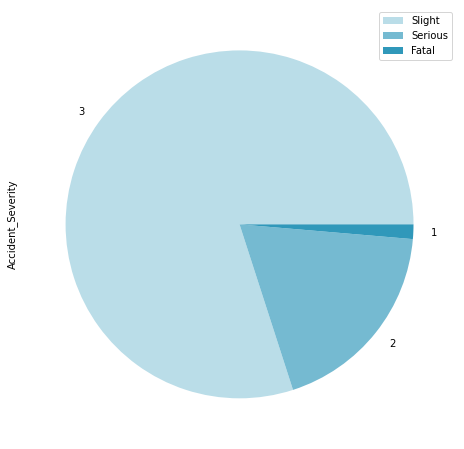

In [128]:
Accident_Severity = accdnt_merged['Accident_Severity'].value_counts()
#Setting the figure size and color palette 
Accident_Severity.plot.pie(figsize=(13,8),colors=sns.color_palette('ocean_r',10))
reversed_labels = list(reversed(df1['label']))
#Setting legend for this pie chart
plt.legend(reversed_labels,loc='best')
plt.show()

### <font color=orange>*Most of the accidents were with slight injuries*</font>

### Pedestrian Crossing Physical Facilities
##### Group by the Pedestrian Crossing Physical Facilities and display on pie chart as the count and Pedestrian Crossing Physical Facilities

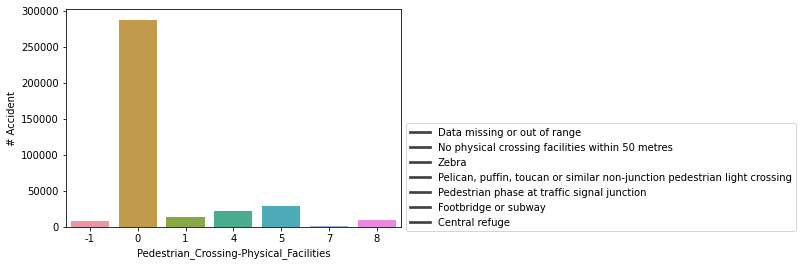

In [129]:
Pedestrian_Crossing_Physical_Facilities=accdnt_merged['Pedestrian_Crossing-Physical_Facilities'].value_counts()
sns.set_palette(sns.color_palette("rocket"))
sns.barplot(x=Pedestrian_Crossing_Physical_Facilities.index, y=Pedestrian_Crossing_Physical_Facilities.values)
ped=df3.sort_values('code' )
plt.xlabel('Pedestrian_Crossing-Physical_Facilities')
plt.ylabel('# Accident')
#Setting legend for this bar plot
plt.legend(ped['label'],loc='best',bbox_to_anchor=(1,0.5))
plt.show()

### <font color=orange>*There was no physical crossing facilities within 50 metres in most of the accident cases*</font>

### Road Surface Conditions Condition
##### Group by the Road Surface Conditions Condition and display on pie chart as the count and Road Surface Conditions Condition

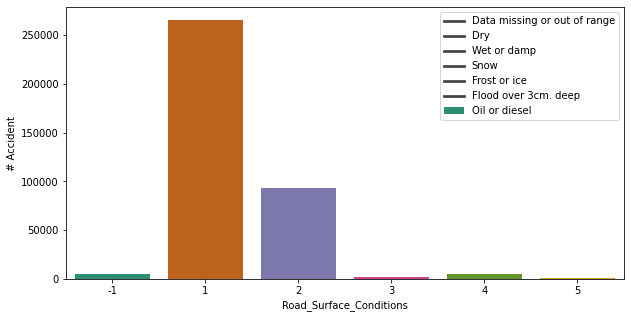

In [130]:
#Setting the figure size and color palette 
sns.set_palette(sns.color_palette("Dark2"))
Road_Surface_Conditions = accdnt_merged['Road_Surface_Conditions'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=Road_Surface_Conditions.index, y=Road_Surface_Conditions.values,ax=ax)
plt.xlabel('Road_Surface_Conditions')
plt.ylabel('# Accident')
rd=df4.sort_values('code')
#Setting legend for this bar plot
plt.legend(rd['label'],loc='best')
plt.show()

### <font color=orange>*The road surface was dry in most of the accident cases*</font>

#### Accident Count on different Condition

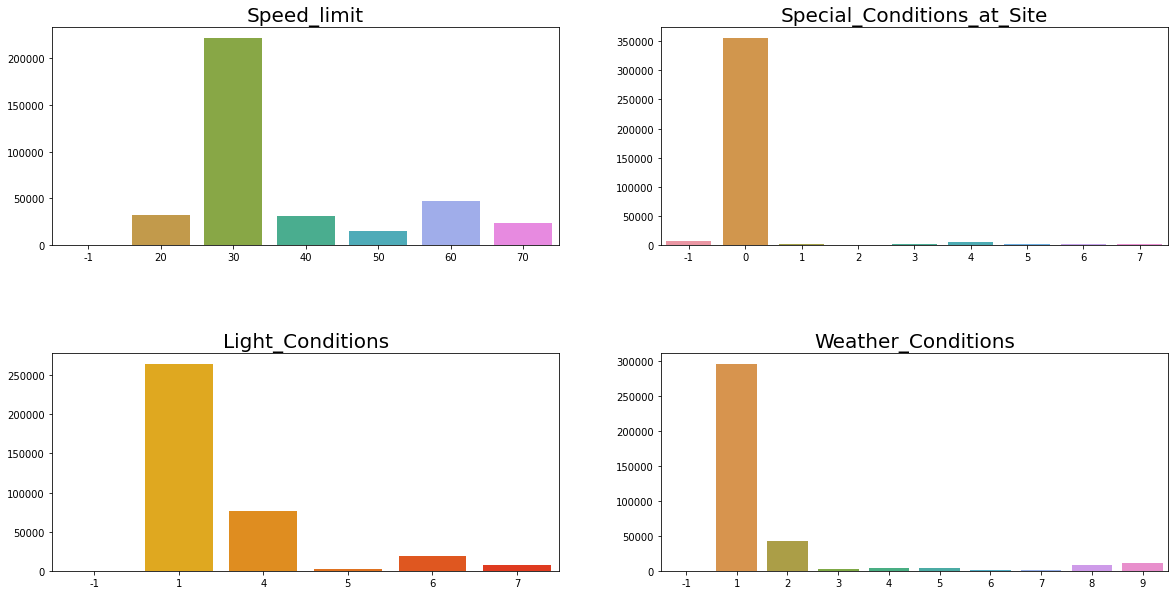

In [131]:
import itertools
sns.set_palette(sns.color_palette("autumn_r"))
All_Conditions=['Speed_limit','Special_Conditions_at_Site','Light_Conditions','Weather_Conditions']
plt.subplots(figsize=(20,10))
length=len(All_Conditions)
#Displaying multiple plots using for loop
for i,j in itertools.zip_longest(All_Conditions,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(i,data=accdnt_merged)
    plt.title(i,size=20)
    plt.ylabel('')
    plt.xlabel('')

plt.show()

#### Junction Control

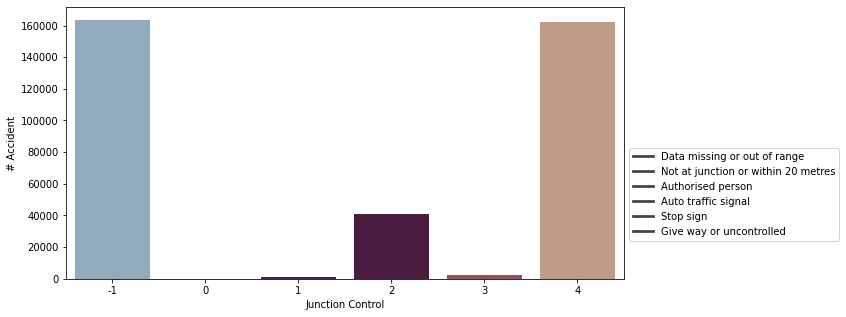

In [132]:
sns.set_palette(sns.color_palette("twilight"))
Junction_Control = accdnt_merged['Junction_Control'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=Junction_Control.index, y=Junction_Control.values,ax=ax)
plt.xlabel('Junction Control')
plt.ylabel('# Accident')
jc=df9.sort_values('code')
#Setting legend for this bar plot
plt.legend(jc['label'],bbox_to_anchor=(1,0.5))
plt.show()

### <font color=orange>*There was give way or uncontrolled junction in most of the accident cases*</font>

#### Check Accident on Days of week

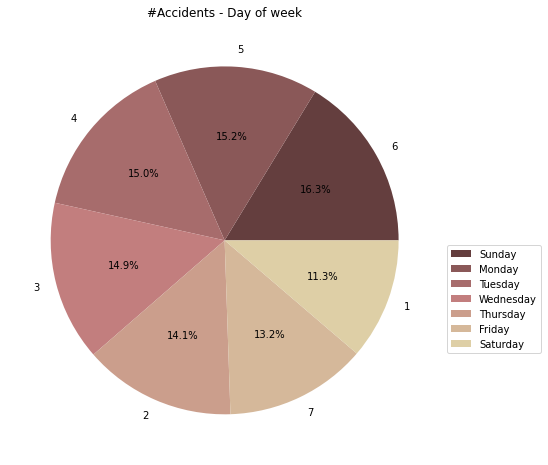

In [133]:
f,ax= plt.subplots(figsize=(9,8))
#Getting count by day of the week
Day_Week = accdnt_merged['Day_of_Week'].dropna().value_counts()
Day_Week.plot.pie(autopct='%1.1f%%',colors=sns.color_palette('pink',10))
plt.title('#Accidents - Day of week')
plt.ylabel('')
#Setting legend for this pie chart
plt.legend(df2['label'],bbox_to_anchor=(1,0.5))
plt.show()

### <font color=orange>*Most of the accidents took place on Sunday*</font>

#### Accident on Road Type

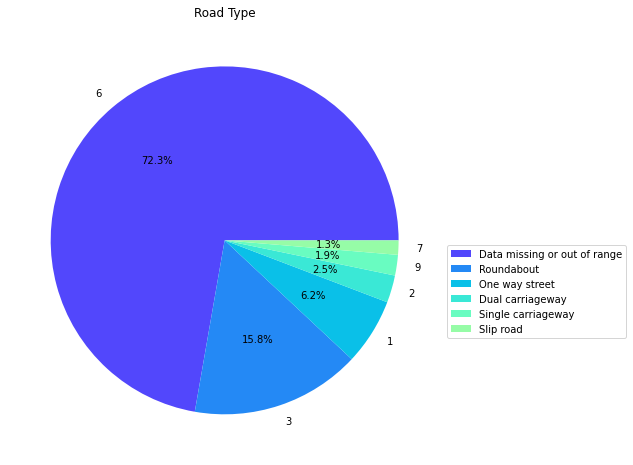

In [134]:
plt.subplots(figsize=(10,8))
Accident_Road_Type=accdnt_merged['Road_Type'].dropna().value_counts()
Accident_Road_Type.plot.pie(autopct='%1.1f%%',colors=sns.color_palette('rainbow',10))
plt.ylabel('')
plt.title('Road Type')
rt=df10.sort_values('code')
#Setting legend for this pie chart
plt.legend(rt['label'],bbox_to_anchor=(1,0.5))
plt.show()

### <font color=orange>*Most of the data is missing but other than that common road type during accident was Roundabout*</font>

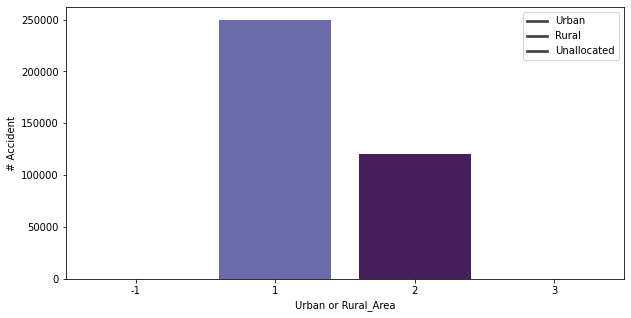

In [135]:
#Setting the figure size and color palette 
sns.set_palette(sns.color_palette("twilight"))
Urbr = accdnt_merged['Urban_or_Rural_Area'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=Urbr.index, y=Urbr.values,ax=ax)
plt.xlabel('Urban or Rural_Area')
plt.ylabel('# Accident')
#Setting legend for this bar plot
plt.legend(df12['label'],loc='upper right')
plt.show()

### <font color=orange>*Most of the accidents took place in Urban regions*</font>

### Correlations & Scatter plot
> A correlation matrix is a table that shows correlation coefficients between features. Each cell within the table displays the relationship between two features.
1. Greater than 0 signifies a positive relationship between two features.
2. Lesser than zero indicates a negative relationship between two features. 
3. Zero indicates no relationship between the two features.

<br> Correlated features means that they bring the same information, hnece it is suggested to remove one of them.

In [136]:
corr = accdnt_merged.corr()
corr.style.background_gradient(cmap='coolwarm')

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Location_Easting_OSGR,1.000000,-0.428136,0.999417,-0.430450,-0.369861,0.036998,0.015468,-0.034255,0.002982,-0.395789,-0.014908,-0.125293,-0.019704,-0.097997,0.026964,0.015877,0.053691,-0.041063,-0.045861,0.050671,0.015170,0.006027,-0.084961,-0.030540,-0.020633,-0.113425,0.095989
Location_Northing_OSGR,-0.428136,1.000000,-0.437069,0.999970,0.159503,-0.049580,-0.021135,0.026628,0.002491,0.122306,0.019524,0.053871,0.013727,0.080270,-0.021756,-0.015473,-0.045537,0.021824,0.044123,-0.016921,-0.012031,0.003176,0.075076,0.024405,0.013557,0.045959,-0.023858
Longitude,0.999417,-0.437069,1.000000,-0.439292,-0.381002,0.037129,0.015867,-0.033615,0.002907,-0.403879,-0.012989,-0.123450,-0.019182,-0.097028,0.025619,0.015757,0.053168,-0.040226,-0.045538,0.049365,0.015222,0.005490,-0.085133,-0.030594,-0.020981,-0.110940,0.096087
Latitude,-0.430450,0.999970,-0.439292,1.000000,0.157669,-0.049530,-0.021028,0.026620,0.002496,0.120843,0.019408,0.054957,0.013577,0.079934,-0.021497,-0.015045,-0.045190,0.022576,0.044169,-0.016659,-0.012058,0.003105,0.075009,0.024412,0.013526,0.045424,-0.023987
Police_Force,-0.369861,0.159503,-0.381002,0.157669,1.000000,-0.055772,0.016417,0.039998,-0.004183,0.981174,0.038736,0.017069,0.017415,0.243697,-0.114136,-0.061050,-0.115261,0.002636,0.066557,-0.101649,-0.010805,-0.049115,0.106031,0.034915,0.037118,0.267569,-0.104493
Accident_Severity,0.036998,-0.049580,0.037129,-0.049530,-0.055772,1.000000,0.068532,-0.072277,0.005162,-0.058341,0.013560,-0.014107,-0.034419,-0.089729,0.032632,0.038802,0.051737,0.017692,-0.027125,0.010673,-0.048082,0.029808,-0.015639,-0.008678,-0.013604,-0.093449,0.131521
Number_of_Vehicles,0.015468,-0.021135,0.015867,-0.021028,0.016417,0.068532,1.000000,0.223011,-0.000181,0.019944,-0.133588,-0.004699,-0.075588,0.114574,0.031781,0.045783,0.035579,0.014143,-0.008036,-0.060923,-0.063503,-0.038266,-0.031039,-0.007036,-0.028764,0.061502,-0.041005
Number_of_Casualties,-0.034255,0.026628,-0.033615,0.026620,0.039998,-0.072277,0.223011,1.000000,-0.001489,0.045987,-0.089538,0.008871,-0.018851,0.166830,-0.009981,-0.028835,-0.039120,0.000809,0.016188,-0.031046,0.027751,-0.025598,0.028906,0.015314,0.010492,0.134802,-0.102395
Day_of_Week,0.002982,0.002491,0.002907,0.002496,-0.004183,0.005162,-0.000181,-0.001489,1.000000,-0.004621,0.005832,0.000166,0.003456,-0.016824,0.008216,0.007078,0.008238,0.000499,-0.000772,0.003530,0.009482,0.006982,0.006948,-0.000145,-0.003234,-0.017514,0.003649
Local_Authority_(District),-0.395789,0.122306,-0.403879,0.120843,0.981174,-0.058341,0.019944,0.045987,-0.004621,1.000000,0.050253,0.027985,0.021363,0.254312,-0.121651,-0.060809,-0.119320,0.005232,0.071303,-0.112778,-0.010679,-0.052590,0.109812,0.036224,0.037942,0.284505,-0.103690


### <font color=orange>*Most correlated features*</font>
#### *1. Local_Authority_(District) and Police_Force*
#### *2. Junction_Detail and 2nd_Road_Class*
#### *3. Speed_Limit and Urban_Rural*


In [137]:
#Sorting by least correlated features
c = accdnt_merged.corr().abs()
s = c.unstack()
so= s.sort_values(kind="quicksort")
so.head()

2nd_Road_Class              Road_Type                     0.000139
Road_Type                   2nd_Road_Class                0.000139
Special_Conditions_at_Site  Day_of_Week                   0.000145
Day_of_Week                 Special_Conditions_at_Site    0.000145
1st_Road_Number             Day_of_Week                   0.000166
dtype: float64

In [138]:
#Valdating individually if Number of vehicles and Accident Severity are correlated
corr, _ = pearsonr(accdnt_merged['Number_of_Vehicles'], accdnt_merged['Accident_Severity'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.069


### Displaying relation between Accident severity and Number of casualties on a scatter map
> A scatterplot shows the relationship between two numerical variables
<br> I have used it to display relation between Accident severity and Number of casualties

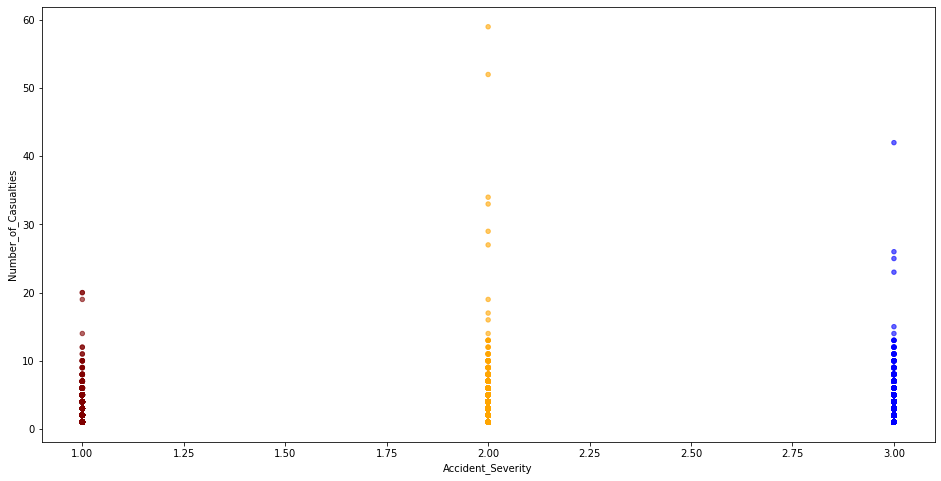

In [139]:
#Setting dictionary for color configuration
c_dict = {
    1 : 'maroon',
    2:  'orange',
    3:  'blue'
}

COLORS= accdnt_merged['Accident_Severity'].map(
    c_dict
)

#Plotting the scatter map
fig = accdnt_merged.plot.scatter(
    
    x='Accident_Severity', 
    y='Number_of_Casualties', 
    c=COLORS, 
    alpha=0.6,
    cmap='Spectral',
    figsize=(16, 8)
)

### References

##### https://towardsdatascience.com/exploratory-data-analysis-tutorial-in-python-15602b417445
##### https://www.analyticsvidhya.com/blog/2020/02/beginner-guide-matplotlib-data-visualization-exploration-python/

##### https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
##### https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
##### https://www.machinelearningplus.com/plots/python-scatter-plot/

# Data Exploration - Casuality

### Step 0: Loading the libraries

In [140]:
import pandas as pd

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

import seaborn as sn

#Using Imputer with a strategy = most_frequent

import sklearn

#import sklearn.impute

from sklearn.impute import SimpleImputer

# from sklearn.preprocessing import Imputer

import statistics

from statistics import mean, median, mode, stdev

### Step 1: Loading Datasets

In [141]:
df_2019 = pd.read_csv("data/Road_Safety_Data_Casualties_2019.csv")
df_2018 = pd.read_csv("data/Road_Safety_Data_Casualties_2018.csv")
df_2017 = pd.read_csv("data/Road_Safety_Data_Casualties_2017.csv")

### Part A: Data Preprocessing

In [142]:
# Verifying all datasets if they're looking alike

df_2019.describe()

df_2019.info()

df_2019.head()

df_2019.isnull().sum(axis = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [143]:
df_2018.describe()

df_2018.info()

df_2018.head()

df_2018.isnull().sum(axis = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160597 entries, 0 to 160596
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      160597 non-null  object
 1   Vehicle_Reference                   160597 non-null  int64 
 2   Casualty_Reference                  160597 non-null  int64 
 3   Casualty_Class                      160597 non-null  int64 
 4   Sex_of_Casualty                     160597 non-null  int64 
 5   Age_of_Casualty                     160597 non-null  int64 
 6   Age_Band_of_Casualty                160597 non-null  int64 
 7   Casualty_Severity                   160597 non-null  int64 
 8   Pedestrian_Location                 160597 non-null  int64 
 9   Pedestrian_Movement                 160597 non-null  int64 
 10  Car_Passenger                       160597 non-null  int64 
 11  Bus_or_Coach_Passenger              160

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [144]:
df_2017.describe()

df_2017.info()

df_2017.head()

df_2017.isnull().sum(axis = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170993 entries, 0 to 170992
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      170993 non-null  object
 1   Vehicle_Reference                   170993 non-null  int64 
 2   Casualty_Reference                  170993 non-null  int64 
 3   Casualty_Class                      170993 non-null  int64 
 4   Sex_of_Casualty                     170993 non-null  int64 
 5   Age_of_Casualty                     170993 non-null  int64 
 6   Age_Band_of_Casualty                170993 non-null  int64 
 7   Casualty_Severity                   170993 non-null  int64 
 8   Pedestrian_Location                 170993 non-null  int64 
 9   Pedestrian_Movement                 170993 non-null  int64 
 10  Car_Passenger                       170993 non-null  int64 
 11  Bus_or_Coach_Passenger              170

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

# Merging datasets into one big dataset

In [145]:
df = df_2019.append(df_2018).append(df_2017)

In [146]:
df

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170988,2017984121217,1,1,3,2,49,8,3,9,6,0,0,0,0,3,-1
170989,2017984121717,1,1,2,1,22,5,3,0,0,1,0,0,19,1,2
170990,2017984122317,1,1,1,1,25,5,3,0,0,0,0,0,4,1,-1
170991,2017984122617,1,1,1,1,49,8,3,0,0,0,0,0,9,3,-1


# Step 3: Visualizations

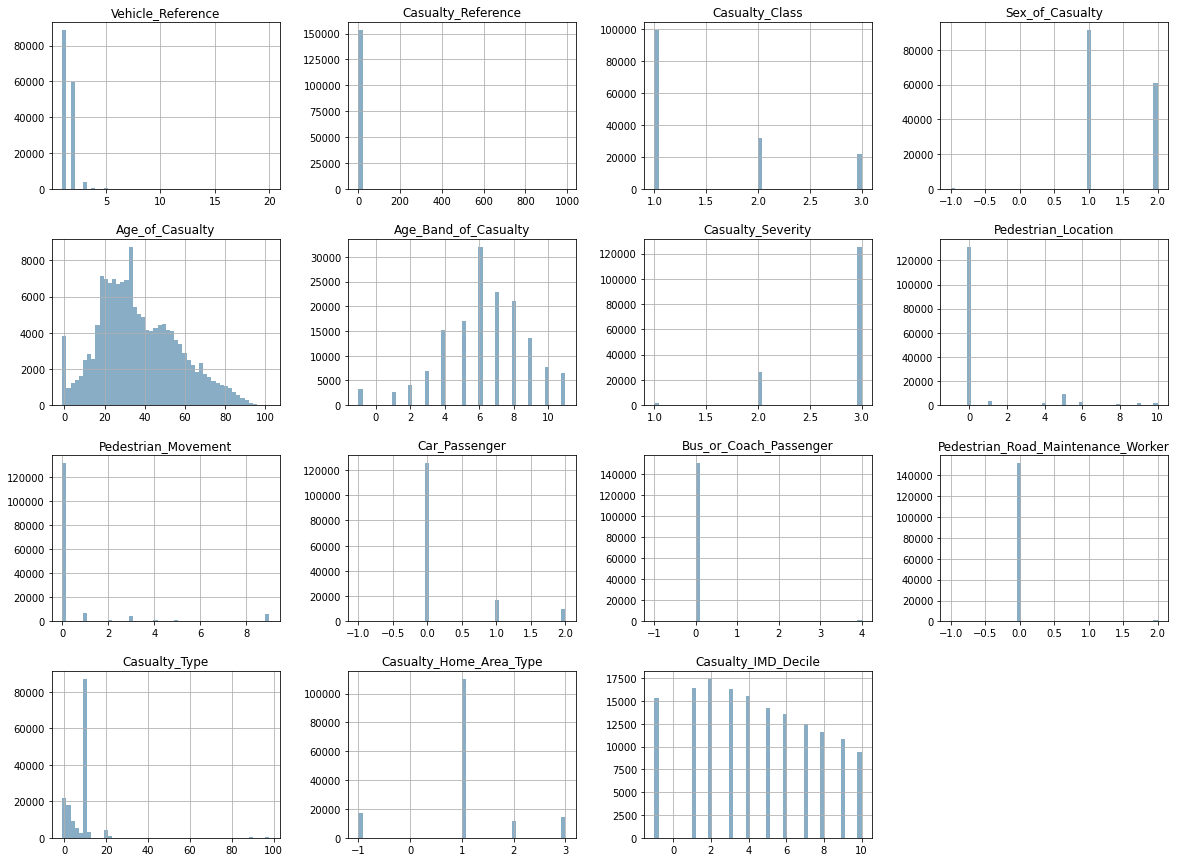

In [147]:
#Histogram

%matplotlib inline   

df_2019.hist(bins=50, figsize=(20,15))
plt.show()

In [148]:
# Correlation Matrix

corrMatrix = df_2019.corr()
print (corrMatrix)

                                    Vehicle_Reference  Casualty_Reference  \
Vehicle_Reference                            1.000000            0.067877   
Casualty_Reference                           0.067877            1.000000   
Casualty_Class                              -0.258599            0.047472   
Sex_of_Casualty                              0.025018            0.016832   
Age_of_Casualty                              0.040903           -0.032687   
Age_Band_of_Casualty                         0.052084           -0.042025   
Casualty_Severity                            0.081866            0.014502   
Pedestrian_Location                         -0.255809           -0.037193   
Pedestrian_Movement                         -0.220934           -0.029688   
Car_Passenger                                0.051404            0.142201   
Bus_or_Coach_Passenger                      -0.033511            0.066342   
Pedestrian_Road_Maintenance_Worker          -0.064693           -0.010446   

In [149]:
# corrMatrix["Class"].sort_values(ascending=False)

cor_target1 = abs(corrMatrix["Casualty_Severity"])
cor_target1.sort_values(ascending=False)

Casualty_Severity                     1.000000
Pedestrian_Location                   0.100796
Age_of_Casualty                       0.091342
Age_Band_of_Casualty                  0.084417
Vehicle_Reference                     0.081866
Pedestrian_Movement                   0.078114
Casualty_Class                        0.073039
Sex_of_Casualty                       0.070190
Casualty_Type                         0.059388
Car_Passenger                         0.054612
Bus_or_Coach_Passenger                0.027139
Pedestrian_Road_Maintenance_Worker    0.019232
Casualty_Home_Area_Type               0.015834
Casualty_Reference                    0.014502
Casualty_IMD_Decile                   0.006082
Name: Casualty_Severity, dtype: float64

In [150]:
#My observations here:

# 1. I didn't see any feature being very strongly correlated, i.e., all are below 0.1
# 2. The only highest correlation I could see is in Pedestrian location. 
# 3. And majority of Pedestrian location in the dataset is 

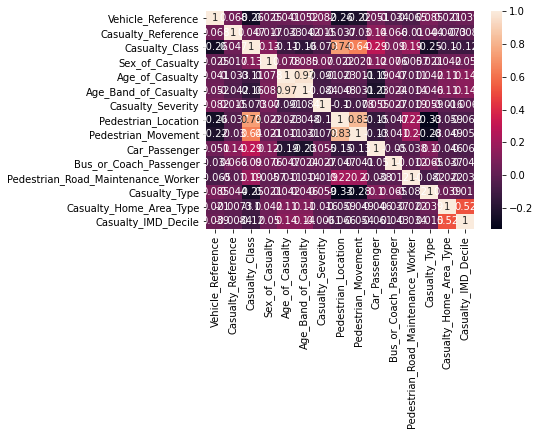

<Figure size 3600x3600 with 0 Axes>

In [151]:
# HeatMap Of Correlation Matrix

sn.heatmap(corrMatrix, annot=True)
plt.figure(figsize = (50,50))
plt.show()

Interesting observations based on the Casualties data visualizations:
1. The Age_of_Casualty between 20-40 years has the most number of occurrences. That indicates, based on the data, most people who met the accident are of the age [20-40] years. This range could be the most susceptible range for getting risks.
2. The Bus_Or_Coach_Passenger with value 0 has the most number of accident occurrences. Means, most number of people who are injured are of type 0 i.e., they are not bus or coach passengers. 
3. Most number of accidents occurred with the Car_Passenger value of 0 (meaning not a car passenger). 
4. Most number of accidents occurred with the Casualty_Class value of 1 (meaning a driver or a rider). That also means that the drivers are more risk prone to accidents.
5. Most number of accidents occurred with the Casualty_Home_Area_Type value of 1. That also means, it was the people who lived in urban areas who were injured mostly, not the ones in small town or rural areas. That also means that the urban areas are more risk prone to accidents.
6. Most number of accidents occurred with the Casualty_IMD_Decile value of 2 (meaning more deprived 10-20%).
7. Most number of accidents occurred with the Casualty_Type value of 10. Casualty_Type 10 means Minibus (8 - 16 passenger seats) occupant. That means, more risk prone people are those who travel in minibuses. They need to be more careful while traveling on roads.
8. Most number of accidents occurred with the Pedestrian_Location value of 0. Pedestrian_Location value of 0 means the person is not a pedestrian. Looking at this point, we can see that pedestrians are comparatively less risk prone.
9. Most number of accidents occurred with the Pedestrian_Movement value of 0. Pedestrian_Location value of 0 means the person is not a pedestrian. Again, we can see that pedestrians are comparatively less risk prone. This reconfirms the above observation.
10. Most number of accidents occurred with the Pedestrian_Road_Maintenance_Worker value of 0. Pedestrian_Road_Maintenance_Worker value 0 means the person who underwent an accident is neither a pedestrian not a maintenance worker. Again, this underscores the above two observations.
11. Most number of accidents occurred with the Sex_of_Casualty value of 1. Value 1 here means Male gender. That means, most of the people who underwent injuries were males. 
12. Most number of accidents occurred with the Casualty_Severity value of 3.Casualty_Severity value of 3 means slight injuries. That means, most of the accidents were slight injuries. The second most was serious injuries. Fatal cases were very rare (relatively). 


# 1. B: Data clean up: 2019 data

In [152]:
df

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170988,2017984121217,1,1,3,2,49,8,3,9,6,0,0,0,0,3,-1
170989,2017984121717,1,1,2,1,22,5,3,0,0,1,0,0,19,1,2
170990,2017984122317,1,1,1,1,25,5,3,0,0,0,0,0,4,1,-1
170991,2017984122617,1,1,1,1,49,8,3,0,0,0,0,0,9,3,-1


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484748 entries, 0 to 170992
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      484748 non-null  object
 1   Vehicle_Reference                   484748 non-null  int64 
 2   Casualty_Reference                  484748 non-null  int64 
 3   Casualty_Class                      484748 non-null  int64 
 4   Sex_of_Casualty                     484748 non-null  int64 
 5   Age_of_Casualty                     484748 non-null  int64 
 6   Age_Band_of_Casualty                484748 non-null  int64 
 7   Casualty_Severity                   484748 non-null  int64 
 8   Pedestrian_Location                 484748 non-null  int64 
 9   Pedestrian_Movement                 484748 non-null  int64 
 10  Car_Passenger                       484748 non-null  int64 
 11  Bus_or_Coach_Passenger              484

In [154]:
df[df['Sex_of_Casualty']<0] #Dirty Data

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
383,2019010156414,1,2,2,-1,4,1,3,0,0,2,0,0,9,1,3
1742,2019010159930,1,2,2,-1,-1,-1,3,0,0,1,0,0,9,1,1
3745,2019010164961,1,3,2,-1,-1,-1,3,0,0,-1,0,0,9,-1,-1
3746,2019010164961,1,4,2,-1,-1,-1,3,0,0,-1,0,0,9,-1,-1
3747,2019010164961,1,5,2,-1,-1,-1,3,0,0,-1,0,0,9,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135825,2017460254631,2,1,1,-1,41,7,3,0,0,0,0,0,9,1,3
135908,2017460256339,1,1,1,-1,30,6,3,0,0,0,0,0,1,-1,-1
144551,2017500218861,4,3,1,-1,-1,-1,3,0,0,0,0,0,1,-1,-1
145931,2017500246243,2,2,1,-1,21,5,3,0,0,0,0,0,3,-1,-1


Only 800 out of 484748 rows are dirty data w.r.t sex of casulaity, not even 1% of the total data. So we can safely drop these rows. Other options of handling dirty data are: 2) To remove the attribute and 3) Impute with a guess (suitable) value. 

Here, the first option of removing the rows make more sense. So, we will drop this dirty records.

In [155]:
df.drop(df[df['Sex_of_Casualty'] < 0].index, inplace=True)

In [156]:
df[df['Sex_of_Casualty']<0] #Good data

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [157]:
df[df['Casualty_Class'] < 0] #Dirty Data

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


No dirty data w.r.t Casualty_Class. so, no need to do anything here.

In [158]:
df[df['Age_of_Casualty'] < 0] #Dirty Data

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
46,2019010155303,1,2,2,2,-1,-1,3,0,0,2,0,0,9,1,2
47,2019010155303,1,3,2,1,-1,-1,3,0,0,2,0,0,9,1,2
120,2019010155611,1,1,2,2,-1,-1,3,0,0,2,0,0,9,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167355,201797GK01401,2,1,1,1,-1,-1,3,0,0,0,0,0,19,-1,-1
167697,201797GP01304,1,1,1,1,-1,-1,3,0,0,0,0,0,5,-1,-1
169269,201797ND00506,2,1,1,2,-1,-1,2,0,0,0,0,0,1,-1,-1
169422,201797NE01403,2,1,1,1,-1,-1,3,0,0,0,0,0,1,1,-1


Only 7704 out of 484748 rows are dirty data w.r.t age of casulaity, which is 0.0158% of the data, not even 1% of the total data. 

So we can safely drop these rows. Other options of handling dirty data are: 2) To remove the attribute and 3) Impute with a guess (suitable) value.

Here, the first option of removing the rows make more sense. So, we will drop this dirty records.

In [159]:
df.drop(df[df['Age_of_Casualty'] < 0].index, inplace=True)

In [160]:
df[df['Age_of_Casualty']>120] #Looks valid data only

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [161]:
df['Age_Band_of_Casualty'].unique()

array([ 9,  5, 10,  8,  4,  7,  6,  3,  1, 11,  2])

In [162]:
df[df['Age_Band_of_Casualty'] < 0] #Looks good only

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [163]:
df['Casualty_Severity'].unique() #Looks good only

array([3, 2, 1])

In [164]:
df[df['Casualty_Severity']>3]

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [165]:
df[df['Casualty_Severity']<1]

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [166]:
df[df['Pedestrian_Location']<0] #Dirty data - 5 records. We will just remove these

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
146604,2019921900298,1,1,3,1,0,1,2,-1,1,0,0,0,0,1,10
139847,2018521802167,1,1,3,2,50,8,3,-1,9,0,0,0,0,-1,-1
139947,2018521802684,1,1,3,2,25,5,3,-1,9,0,0,0,0,1,8
140302,2018521803925,1,1,3,2,40,7,3,-1,9,0,0,0,0,1,7
141708,2018521901393,1,1,3,1,71,10,3,-1,9,0,0,0,0,1,10


In [167]:
df.drop(df[df['Pedestrian_Location'] < 0].index, inplace=True)

In [168]:
df[df['Pedestrian_Location']>10] #Looks good

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [169]:
df[df['Pedestrian_Movement']<0] #No dirty data - looks good

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [170]:
df[df['Pedestrian_Movement']>0]['Pedestrian_Movement'].unique() #data in range - looks good

array([4, 3, 1, 9, 2, 5, 7, 8, 6])

For Pedestrian_Movement, 0-9 are the valid data values. -1 is dirty data

In [171]:
df[df['Car_Passenger']<0] #No dirty data - looks good

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
731,2019010157383,1,2,2,2,53,8,3,0,0,-1,0,0,9,1,3
743,2019010157412,1,1,2,2,53,8,3,0,0,-1,0,0,9,1,2
823,2019010157686,1,1,2,2,18,4,3,0,0,-1,0,0,9,1,5
871,2019010157798,1,2,2,2,18,4,3,0,0,-1,0,0,9,-1,-1
1002,2019010158143,1,1,2,2,8,2,3,0,0,-1,0,0,9,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135970,2017460256972,1,2,2,2,24,5,3,0,0,-1,0,0,9,2,10
135990,2017460257653,1,1,2,1,69,10,3,0,0,-1,0,0,9,1,7
142777,2017500176043,1,1,2,1,29,6,3,0,0,-1,0,0,9,1,2
150399,2017530166354,1,1,2,2,19,4,3,0,0,-1,0,0,9,1,1


Valid range of Car_Passenger is [0-2]. -1 is bad data. Bad data is 1236/484748 = 0.00254977844. Not even 1%. So, I want to safely remove this data.

In [172]:
df[df['Car_Passenger']<0] #No dirty data - looks good

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
731,2019010157383,1,2,2,2,53,8,3,0,0,-1,0,0,9,1,3
743,2019010157412,1,1,2,2,53,8,3,0,0,-1,0,0,9,1,2
823,2019010157686,1,1,2,2,18,4,3,0,0,-1,0,0,9,1,5
871,2019010157798,1,2,2,2,18,4,3,0,0,-1,0,0,9,-1,-1
1002,2019010158143,1,1,2,2,8,2,3,0,0,-1,0,0,9,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135970,2017460256972,1,2,2,2,24,5,3,0,0,-1,0,0,9,2,10
135990,2017460257653,1,1,2,1,69,10,3,0,0,-1,0,0,9,1,7
142777,2017500176043,1,1,2,1,29,6,3,0,0,-1,0,0,9,1,2
150399,2017530166354,1,1,2,2,19,4,3,0,0,-1,0,0,9,1,1


In [173]:
 df[df['Car_Passenger']>=0]['Car_Passenger'].unique() #data in range - looks good

array([0, 1, 2])

In [174]:
 df.drop(df[df['Age_of_Casualty'] < 0].index, inplace=True)

In [175]:
 df['Bus_or_Coach_Passenger'].unique() #Has dirty data = -1. now, we want to find how much dirty data is existing.

array([ 0,  4,  3,  1,  2, -1])

In [176]:
 df[df['Bus_or_Coach_Passenger']<0] #dirty data - 98/484748

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
3401,2019010164122,1,1,2,2,39,7,2,0,0,0,-1,0,11,1,2
4047,2019010165668,1,1,2,2,45,7,2,0,0,0,-1,0,11,1,2
11077,2019010183620,1,1,2,2,3,1,3,0,0,0,-1,0,11,-1,-1
16464,2019010196755,1,1,2,2,15,3,3,0,0,0,-1,0,11,-1,-1
21679,2019010208809,1,2,2,1,59,9,2,0,0,0,-1,0,11,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134481,2017460231867,1,1,2,2,11,3,3,0,0,0,-1,0,11,-1,-1
135260,2017460244985,1,1,2,2,60,9,3,0,0,0,-1,0,11,1,3
135458,2017460248698,1,1,2,1,86,11,3,0,0,0,-1,0,11,1,8
135512,2017460249911,1,3,2,2,19,4,3,0,0,0,-1,0,11,1,2


 Valid range of Bus_or_Coach_Passenger is [0-4]. -1 is bad data. Bad data is 1236/484748 = 0.00254977844. Not even 1%. So, I want to safely remove this data.

In [177]:
 df.drop(df[df['Bus_or_Coach_Passenger'] < 0].index, inplace=True)

In [178]:
 df['Pedestrian_Road_Maintenance_Worker'].unique() 
    #Has dirty data = -1. now, we want to find how much dirty data is existing.

array([ 0,  1,  2, -1])

In [179]:
 df[df['Pedestrian_Road_Maintenance_Worker']<0] #189 rows dirty data. Not even 1% of the whole data

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
45884,2019100833015,1,1,3,1,30,6,3,5,7,0,0,-1,0,1,9
46214,2019100844139,1,1,3,1,20,4,3,1,3,0,0,-1,0,-1,-1
46356,2019100849987,1,1,3,1,30,6,3,9,7,0,0,-1,0,1,6
46501,2019100856038,1,1,3,1,74,10,3,9,9,0,0,-1,0,1,1
46718,2019100864929,1,1,3,2,84,11,3,1,9,0,0,-1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129500,2017460145558,1,1,3,2,27,6,3,9,9,0,0,-1,0,1,9
130375,2017460160529,1,1,3,1,20,4,3,5,2,0,0,-1,0,-1,-1
132891,2017460206230,1,1,3,1,37,7,2,10,9,0,0,-1,0,1,7
133701,2017460218154,1,1,3,1,30,6,3,6,8,0,0,-1,0,1,10



 Valid range of Pedestrian_Road_Maintenance_Worker is [0-2]. -1 is bad data. Bad data is 1236/484748 = 0.00254977844. Not even 1%. So, I want to safely remove this data.

In [180]:
 df.drop(df[df['Pedestrian_Road_Maintenance_Worker'] < 0].index, inplace=True)

In [181]:
valid_Casuality_Type= [0,1,2,3,4,5,8,9,10,11,16,17,18,19,20,21,22,23,90,97,98]

sorted(df['Casualty_Type'].unique())

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 8,
 9,
 10,
 11,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 90,
 97,
 98]

In [182]:
df[df['Casualty_Type']<0] #dirty data - 10 rows. Can safely remove

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
6526,2019010172289,1,1,1,2,28,6,3,0,0,0,0,0,-1,1,1
6724,2019010172723,2,1,1,1,46,8,3,0,0,0,0,0,-1,1,4
88245,2019350859952,2,1,1,1,45,7,3,0,0,0,0,0,-1,2,10
75816,2018210352761,1,1,1,1,33,6,3,0,0,0,0,0,-1,1,1
122820,2018460275621,2,1,1,2,31,6,3,0,0,0,0,0,-1,1,2
128020,201846T315787,2,1,1,2,48,8,3,0,0,0,0,0,-1,-1,-1
134908,2018500296865,2,1,1,1,54,8,2,0,0,0,0,0,-1,1,1
79013,2017210172799,2,1,1,2,20,4,3,0,0,0,0,0,-1,1,3
96974,201734WS05137,2,1,1,1,27,6,3,0,0,0,0,0,-1,1,5
132157,2017460192094,2,1,1,1,68,10,2,0,0,0,0,0,-1,1,5


Only dirty data are -1 values of casuality type - 10 rows. Can safely remove them.

In [183]:
 df.drop(df[df['Casualty_Type'] < 0].index, inplace=True)

In [184]:
df['Casualty_Home_Area_Type'].unique() 

array([ 1, -1,  2,  3])

In [185]:
 df[df['Casualty_Home_Area_Type']<0] #dirty data - 

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
14,2019010155198,1,3,2,2,25,5,3,0,0,2,0,0,9,-1,-1
16,2019010155198,1,5,2,2,28,6,3,0,0,2,0,0,9,-1,-1
18,2019010155207,1,1,1,1,34,6,3,0,0,0,0,0,8,-1,-1
32,2019010155256,1,1,1,1,63,9,3,0,0,0,0,0,9,-1,-1
37,2019010155276,2,1,1,1,65,9,2,0,0,0,0,0,5,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170941,2017984108417,1,1,3,2,11,3,3,5,1,0,0,0,0,-1,-1
170945,2017984110217,1,1,1,2,54,8,3,0,0,0,0,0,9,-1,-1
170956,2017984113717,1,2,2,1,50,8,1,0,0,1,0,0,9,-1,-1
170957,2017984114417,1,1,1,1,47,8,2,0,0,0,0,0,9,-1,-1


 Valid range of Casualty_Home_Area_Type is [1-3]. -1 is bad data. Bad data is 64465/484748 = 13.2%
    
    This is a lot of data. I do not want to end up in risking the data. Based on the home type, we can estimate their financial status.
    
1) I want to impute this data by mode.

As we see in the histogram, most of the home area type is 1. So, I want to impute values with mode.

### Imputing Casuality_Home_Area_Type with most frequent

In [186]:
df['Casualty_Home_Area_Type'].fillna(df['Casualty_Home_Area_Type'].mode()[0], inplace = True)

In [187]:
 df[df['Casualty_Home_Area_Type']<0] #dirty data - 

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
14,2019010155198,1,3,2,2,25,5,3,0,0,2,0,0,9,-1,-1
16,2019010155198,1,5,2,2,28,6,3,0,0,2,0,0,9,-1,-1
18,2019010155207,1,1,1,1,34,6,3,0,0,0,0,0,8,-1,-1
32,2019010155256,1,1,1,1,63,9,3,0,0,0,0,0,9,-1,-1
37,2019010155276,2,1,1,1,65,9,2,0,0,0,0,0,5,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170941,2017984108417,1,1,3,2,11,3,3,5,1,0,0,0,0,-1,-1
170945,2017984110217,1,1,1,2,54,8,3,0,0,0,0,0,9,-1,-1
170956,2017984113717,1,2,2,1,50,8,1,0,0,1,0,0,9,-1,-1
170957,2017984114417,1,1,1,1,47,8,2,0,0,0,0,0,9,-1,-1


In [188]:
print (statistics.mode(df['Casualty_Home_Area_Type'])) # df is my data frame name

1


In [189]:
df['Casualty_Home_Area_Type'] = df['Casualty_Home_Area_Type'].replace(-1, 1)

In [190]:
 df[df['Casualty_Home_Area_Type']<0] #dirty data - 

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [191]:
sorted(df['Casualty_IMD_Decile'].unique())

[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [192]:
 df[df['Casualty_IMD_Decile']<0] #dirty data - 

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
14,2019010155198,1,3,2,2,25,5,3,0,0,2,0,0,9,1,-1
16,2019010155198,1,5,2,2,28,6,3,0,0,2,0,0,9,1,-1
18,2019010155207,1,1,1,1,34,6,3,0,0,0,0,0,8,1,-1
32,2019010155256,1,1,1,1,63,9,3,0,0,0,0,0,9,1,-1
37,2019010155276,2,1,1,1,65,9,2,0,0,0,0,0,5,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170986,2017984120717,2,2,1,1,24,5,2,0,0,0,0,0,19,2,-1
170988,2017984121217,1,1,3,2,49,8,3,9,6,0,0,0,0,3,-1
170990,2017984122317,1,1,1,1,25,5,3,0,0,0,0,0,4,1,-1
170991,2017984122617,1,1,1,1,49,8,3,0,0,0,0,0,9,3,-1


 Valid range of Casualty_IMD_Decile is [1-10]. -1 is bad data. Bad data is 86593/484748 = 0.17863508462

This is a lot of data. I do not want to end up in risking the data. Based on the home type, we can estimate their financial status.
1) If I want to impute this data by mode.

As we see in the histogram, most of the home area type is -1. So, lot of missing data. The second highest is:2

2) But, if we look at the data correlation matrix, this column is not that important to the target column. 
So, I can safely drop this feature only all together. 



In [193]:
print (statistics.mode(df['Casualty_IMD_Decile'])) # df is my data frame name

-1


In [194]:
df.drop(['Casualty_IMD_Decile'], axis=1)

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1
5,2019010155192,1,1,3,1,68,10,2,5,4,0,0,0,0,1
6,2019010155194,1,1,1,2,47,8,3,0,0,0,0,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170988,2017984121217,1,1,3,2,49,8,3,9,6,0,0,0,0,3
170989,2017984121717,1,1,2,1,22,5,3,0,0,1,0,0,19,1
170990,2017984122317,1,1,1,1,25,5,3,0,0,0,0,0,4,1
170991,2017984122617,1,1,1,1,49,8,3,0,0,0,0,0,9,3


#### Handling missing data

Important points:
1. In the entire dataset, only 800 out of 484748 rows are dirty data w.r.t sex of causality, not even 1% of the total data. So we can safely drop these rows. Other options for handling dirty data are: 2) To remove the attribute and 3) Impute with a guess (suitable) value.
2. Here, the first option of removing the rows seems to be more appropriate because the missing data is comparatively smaller. So, we will drop these dirty records.
3. There is no dirty data w.r.t Casualty_Class. So, no need to do anything here.
4. Only 7704 out of 484748 rows are dirty data w.r.t age of causality, which is 0.0158% of the data, not even 1% of the total data.
5. So we can safely drop these rows. Other options for handling dirty data are: 2) To remove the attribute and 3) Impute with a guess (suitable) value.
6. Here, the first option of removing the rows seems to be more appropriate because the missing data is comparatively smaller. So, we will drop these dirty records.
7. Casualty_Severity data looks good. Nothing to do here.
8. Pedestrian_Location has 5 missing data records. Here, removing the rows seems to be more appropriate because the missing data is very small. So, we will drop these dirty records.
9. Pedestrian_Movement data looks good. Nothing to do here.
10. Car_Passenger has 1236 missing values. The valid range of Car_Passenger is [0-2]. -1 is bad data. Bad data is 1236/484748 = 0.00254977844. Not even 1%. So, we want to safely remove this data. 
11. Bus_or_Coach_Passenger has 98 missing values. Valid range of Bus_or_Coach_Passenger is [0-4]. -1 is bad data. Bad data is 1236/484748 = 0.00254977844. Not even 1%.Pedestrian_Road_Maintenance_Worker has 189 rows of dirty data. Not even 1% of the whole data.  So, we want to safely remove this data.
12. The valid range of Pedestrian_Road_Maintenance_Worker is [0-2]. -1 is bad data. Bad data is 1236/484748 = 0.00254977844. Not even 1%. So, we want to safely remove this data.
13. Casualty_Type has 10 missing values. Not even 1%. So, we want to safely remove this data. Only dirty data are -1 values of casualty type - 10 rows. Can safely remove them.
14. Valid range of Casualty_Home_Area_Type is [1-3]. -1 is bad data. Bad data is 64465/484748 = 13.2%
15. This is a lot of data. We do not want to end up risking the data. Based on the home type, we can estimate their financial status.

Solution: We want to impute this data by mode. As we see in the histogram, most of the home area type is 1. So, we imputed the missing values with mode.
16. Casualty_IMD_Decile has 458848 missing values. As seen in the correlation matrix and histogram, this does not look like any important feature in this data. So, we could safely drop the column.


In [195]:
df

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1
5,2019010155192,1,1,3,1,68,10,2,5,4,0,0,0,0,1,4
6,2019010155194,1,1,1,2,47,8,3,0,0,0,0,0,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170988,2017984121217,1,1,3,2,49,8,3,9,6,0,0,0,0,3,-1
170989,2017984121717,1,1,2,1,22,5,3,0,0,1,0,0,19,1,2
170990,2017984122317,1,1,1,1,25,5,3,0,0,0,0,0,4,1,-1
170991,2017984122617,1,1,1,1,49,8,3,0,0,0,0,0,9,3,-1


Yay!!! The data is finally ready here 

# End of Data Preprocessing and exploration

### Saving the cleaned up data into a CSV file called data.csv

In [196]:
df.to_csv(r'data/data.csv', index = False)

In [197]:
df

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1
5,2019010155192,1,1,3,1,68,10,2,5,4,0,0,0,0,1,4
6,2019010155194,1,1,1,2,47,8,3,0,0,0,0,0,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170988,2017984121217,1,1,3,2,49,8,3,9,6,0,0,0,0,3,-1
170989,2017984121717,1,1,2,1,22,5,3,0,0,1,0,0,19,1,2
170990,2017984122317,1,1,1,1,25,5,3,0,0,0,0,0,4,1,-1
170991,2017984122617,1,1,1,1,49,8,3,0,0,0,0,0,9,3,-1


# References:

https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data